In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
!pip install MiniSom
from minisom import MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=addf988ad19a5206f9662d9f2a51d0f73057e9f802e296500e5c9323210275fd
  Stored in directory: /root/.cache/pip/wheels/0f/8c/a4/5b7aa56fa6ef11d536d45da775bcc5a2a1c163ff0f8f11990b
Successfully built MiniSom


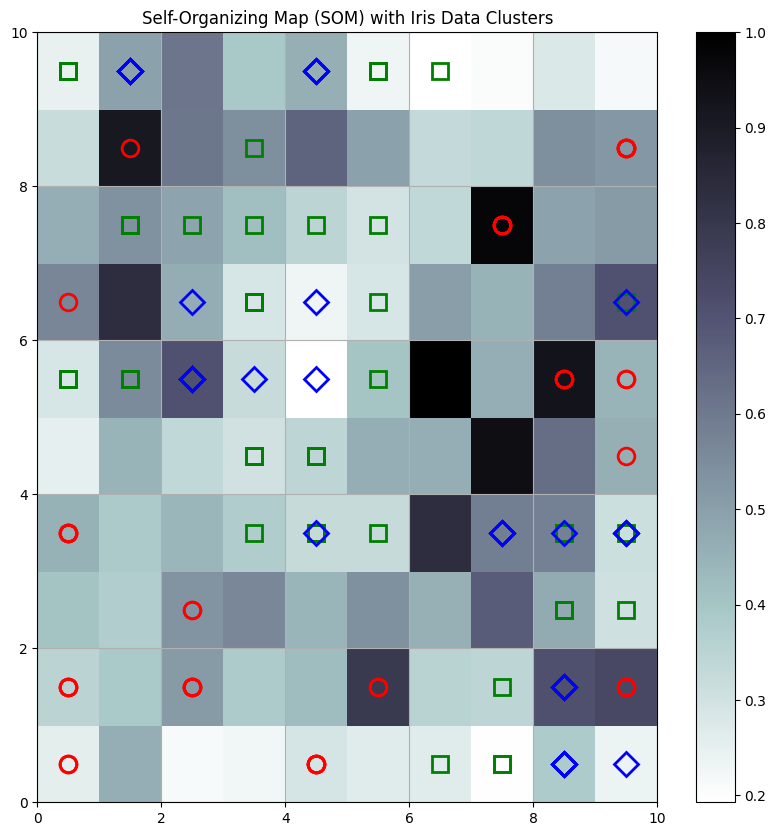

In [22]:
iris = load_iris()
x = iris.data
y = iris.target

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Increase SOM size for better visualization of clusters
som = MiniSom(x = 10, y = 10, input_len = x_scaled.shape[1], sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(x_scaled)
som.train_random(data = x_scaled, num_iteration = 100)


plt.figure(figsize=(10, 10)) # Adjust figsize for a larger map

# Plotting the distance map (U-matrix) as background for structure
plt.pcolor(som.distance_map().T, cmap='bone_r') # Transposed for typical SOM visualization
plt.colorbar() # Add a color bar to understand distances

# Move title and grid outside the loop
plt.title("Self-Organizing Map (SOM) with Iris Data Clusters")
plt.grid(True)

# Define markers and colors for each class for clearer distinction
markers = ['o', 's', 'D'] # Circle, Square, Diamond
colors = ['r', 'g', 'b'] # Red, Green, Blue

# Overlay data points with distinct markers for each class
for i, x_val in enumerate(x_scaled):
    w = som.winner(x_val)
    # Plotting a marker for each class at its winner neuron
    plt.plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markerfacecolor='None',
             markeredgecolor=colors[y[i]], markersize=12, markeredgewidth=2)

plt.show()